## Задание 1

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
water = pd.read_csv('C:/Netology/Homeworksfiles/Statistic/water.csv')
water

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
1,2,North,Birkenhead,1668,17
2,3,South,Birmingham,1466,5
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
...,...,...,...,...,...
56,57,South,Walsall,1527,60
57,58,South,West Bromwich,1627,53
58,59,South,West Ham,1486,122
59,60,South,Wolverhampton,1485,81


<AxesSubplot:title={'center':'Влияние жесткости воды на смертность'}, xlabel='hardness', ylabel='mortality'>

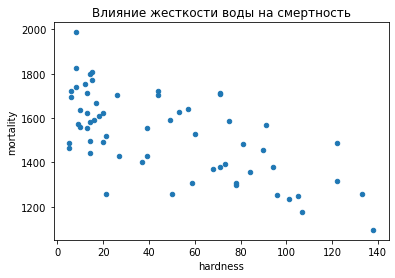

In [4]:
# Построим точечный график взаимосвязи жесткости воды и смертности населения
water.plot(kind= 'scatter', x = 'hardness',  y = 'mortality',
                             title= 'Влияние жесткости воды на смертность',
                             xlabel= 'Уровень жесткости',
                             ylabel= 'Уровень смертности')

In [7]:
# Считаем коэфицент корреляции Пирсона 
water[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.654849
mortality,-0.654849,1.000000


In [8]:
# Считаем коэфицент корреляции Спирмана 
water[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.631665
mortality,-0.631665,1.000000


In [9]:
# В целом, на графике и по коэфицентам видна обратная взаимосвязь между исследуемыми показателями,
# т.е. чем выше жесткость воды, тем ниже смертность.

In [10]:
# Построим модель линейной регрессии
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [11]:
X = water[['hardness']]
y = water['mortality']

# Из-за малого количества данных, зададим 40% на обучение
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [12]:
X_train.shape

(36, 1)

In [13]:
y_train.shape

(36,)

In [14]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [15]:
model.coef_

array([-3.03290421])

In [16]:
model.intercept_

1674.316208502996

In [17]:
y_pred = model.predict(X_test)
y_pred

array([1355.8612662 , 1643.98716638, 1631.85554953, 1540.86842316,
       1437.74967994, 1613.65812426, 1270.93994826, 1446.84839257,
       1610.62522004, 1656.11878323, 1495.37485997, 1428.6509673 ,
       1556.03294422, 1631.85554953, 1458.98000942, 1556.03294422,
       1643.98716638, 1628.82264532, 1367.99288305, 1619.72393268,
       1525.7039021 , 1610.62522004, 1468.07872206, 1501.4406684 ,
       1255.77542719])

In [18]:
# Сравним наши прогнозы
res_water = X_test.copy()
res_water['y_pred'] = y_pred
res_water['y_test'] = y_test
res_water.head()

,hardness,y_pred,y_test
0,105,1355.861266,1247
5,10,1643.987166,1558
46,14,1631.855550,1495
31,44,1540.868423,1702
13,78,1437.749680,1307


In [19]:
# Рассчитаем коэффициент детерминации
model.score(X_test, y_test)

0.4614882677553057

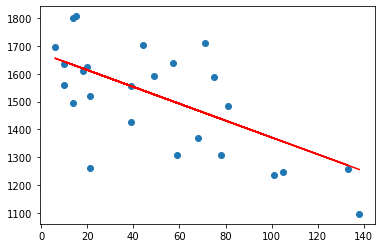

In [20]:
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, c='r')

In [28]:
# Выведим график остатков
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)

In [30]:
X_const = sm.add_constant(X_train)

In [31]:
X_const.shape

(36, 2)

In [36]:
model = sm.OLS(y_train, X_const)
results = model.fit()

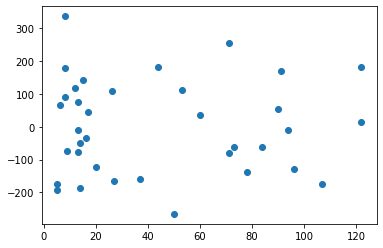

In [35]:
plt.scatter(X_const.iloc[:, 1], results.resid)

## Задание 2

In [57]:
# Так как, в нашем датафрейме есть данные для северных и южных городов. Разделим эти данные на 2 группы: север и юг.
# И проведем все выше приведенные операции для каждой группы в отдельности. 

### Северные города

In [37]:
# Создадим датафрейм с данными по северным городам
water_north = water.loc[ water['location'] == 'North']
water_north.head()

,Unnamed: 0,location,town,mortality,hardness
1,2,North,Birkenhead,1668,17
3,4,North,Blackburn,1800,14
4,5,North,Blackpool,1609,18
5,6,North,Bolton,1558,10
6,7,North,Bootle,1807,15


<AxesSubplot:title={'center':'Влияние жесткости воды на смертность в северных городах'}, xlabel='hardness', ylabel='mortality'>

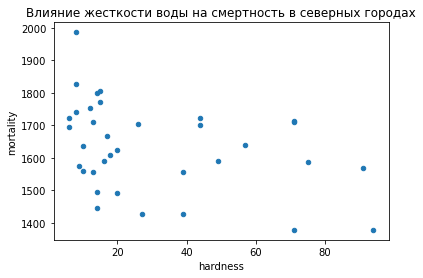

In [38]:
# Построим точечный график взаимосвязи жесткости воды и смертности населения для северных городов
water_north.plot(kind= 'scatter', x = 'hardness',  y = 'mortality',
                             title= 'Влияние жесткости воды на смертность в северных городах',
                             xlabel= 'Уровень жесткости',
                             ylabel= 'Уровень смертности')

In [39]:
# Считаем коэфицент корреляции Пирсона 
water_north[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.368598
mortality,-0.368598,1.000000


In [40]:
# Считаем коэфицент корреляции Спирмана 
water_north[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.404208
mortality,-0.404208,1.000000


In [ ]:
# Видна обратная взаимосвязь между исследуемыми показателями - чем выше жесткость воды, тем ниже смертность.

In [41]:
# Построим модель линейной регрессии для данных по северным городам
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [93]:
X_north = water_north[['hardness']]
y_north = water_north['mortality']

# Из-за малого количества данных, зададим 50% на обучение
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.50, \
                                                                            random_state=42)

In [69]:
X_north_train.shape

(17, 1)

In [70]:
y_north_train.shape

(17,)

In [97]:
model_north = LinearRegression()
model_north.fit(X_north_train, y_north_train)

LinearRegression()

In [98]:
model_north.coef_

array([-1.14840369])

In [99]:
model_north.intercept_

1659.62147501213

In [100]:
y_pred_north = model_north.predict(X_north_test)
y_pred_north

array([1650.43424551, 1649.28584182, 1643.54382339, 1652.73105289,
       1641.24701601, 1578.0848132 , 1609.09171276, 1650.43424551,
       1614.8337312 , 1642.3954197 , 1614.8337312 , 1636.65340126,
       1640.09861232, 1642.3954197 , 1650.43424551, 1643.54382339,
       1648.13743814, 1551.67152838])

In [101]:
# Сравним наши прогнозы по северным городам
res_water_north = X_north_test.copy()
res_water_north['y_pred'] = y_pred_north
res_water_north['y_test'] = y_north_test
res_water_north.head()

,hardness,y_pred,y_test
45,8,1650.434246,1987
23,9,1649.285842,1574
43,14,1643.543823,1444
36,6,1652.731053,1724
26,16,1641.247016,1591


In [102]:
# Рассчитаем коэффициент детерминации для данных северных городов
model_north.score(X_north_test, y_north_test)

0.10998286635580612

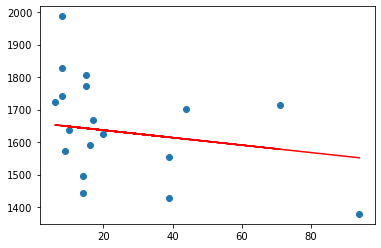

In [103]:
plt.scatter(X_north_test, y_north_test)
plt.plot(X_north_test, y_pred_north, c='r')

In [104]:
# Выведим график остатков
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [105]:
X_north_train, X_north_test, y_north_train, y_north_test = train_test_split(X_north, y_north, test_size=0.50,\
                                                                            random_state=42)

In [106]:
X_north_const = sm.add_constant(X_north_train)

In [107]:
X_north_const.shape

(17, 2)

In [108]:
model_north = sm.OLS(y_north_train, X_north_const)
results_north = model_north.fit()

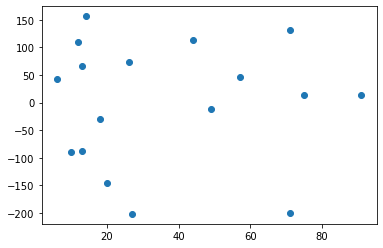

In [109]:
plt.scatter(X_north_const.iloc[:, 1], results_north.resid)

### Южные города

In [89]:
# Создадим датафрейм с данными по южным городам
water_south = water.loc[ water['location'] == 'South']
water_south.head()

,Unnamed: 0,location,town,mortality,hardness
0,1,South,Bath,1247,105
2,3,South,Birmingham,1466,5
7,8,South,Bournemouth,1299,78
9,10,South,Brighton,1359,84
10,11,South,Bristol,1392,73


<AxesSubplot:title={'center':'Влияние жесткости воды на смертность в южных городах'}, xlabel='hardness', ylabel='mortality'>

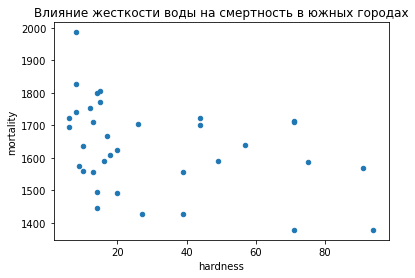

In [90]:
# Построим точечный график взаимосвязи жесткости воды и смертности населения для южных городов
water_north.plot(kind= 'scatter', x = 'hardness',  y = 'mortality',
                             title= 'Влияние жесткости воды на смертность в южных городах',
                             xlabel= 'Уровень жесткости',
                             ylabel= 'Уровень смертности')

In [91]:
# Считаем коэфицент корреляции Пирсона 
water_south[['hardness', 'mortality']].corr()

,hardness,mortality
hardness,1.000000,-0.602153
mortality,-0.602153,1.000000


In [92]:
# Считаем коэфицент корреляции Спирмана 
water_south[['hardness', 'mortality']].corr(method='spearman')

,hardness,mortality
hardness,1.000000,-0.595723
mortality,-0.595723,1.000000


In [ ]:
# Также, как и в предыдущих графиках, видна обратная взаимосвязь между исследуемыми показателями - чем выше жесткость 
# воды, тем ниже смертность.

In [94]:
X_south = water_south[['hardness']]
y_south = water_south['mortality']

# Из-за малого количества данных, зададим 50% на обучение
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.50, \
                                                                            random_state=42)

In [96]:
X_south_train.shape

(13, 1)

In [95]:
y_south_train.shape

(13,)

In [110]:
model_south = LinearRegression()
model_south.fit(X_south_train, y_south_train)

LinearRegression()

In [111]:
model_south.coef_

array([-3.2498036])

In [112]:
model_south.intercept_

1621.772371804028

In [113]:
y_pred_south = model_south.predict(X_south_test)
y_pred_south

array([1225.29633267, 1605.52335381, 1280.54299386, 1225.29633267,
       1501.52963862, 1553.52649621, 1430.03395943, 1605.52335381,
       1449.53278103, 1553.52649621, 1368.28769104, 1576.27512141,
       1274.04338666])

In [114]:
# Сравним наши прогнозы по южным городам
res_water_south = X_south_test.copy()
res_water_south['y_pred'] = y_pred_south
res_water_south['y_test'] = y_south_test
res_water_south.head()

,hardness,y_pred,y_test
18,122,1225.296333,1318
38,5,1605.523354,1486
0,105,1280.542994,1247
58,122,1225.296333,1486
27,37,1501.529639,1402


In [115]:
# Рассчитаем коэффициент детерминации для данных южных городов
model_south.score(X_south_test, y_south_test)

-0.13991732761974518

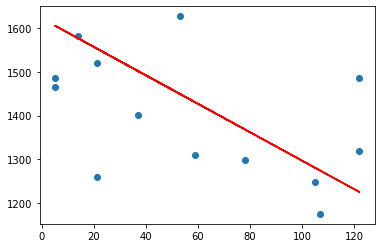

In [116]:
plt.scatter(X_south_test, y_south_test)
plt.plot(X_south_test, y_pred_south, c='r')

In [121]:
X_south_train, X_south_test, y_south_train, y_south_test = train_test_split(X_south, y_south, test_size=0.50,\
                                                                            random_state=42)

In [122]:
X_south_const = sm.add_constant(X_south_train)

In [123]:
X_south_const.shape

(13, 2)

In [124]:
model_south = sm.OLS(y_south_train, X_south_const)
results_south = model_south.fit()

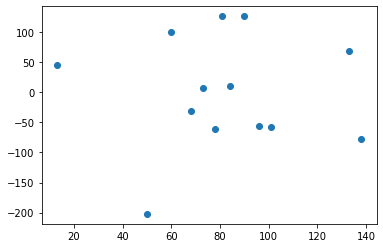

In [125]:
plt.scatter(X_south_const.iloc[:, 1], results_south.resid)